In [4]:
import sys
sys.path.append('/global/homes/y/yzh/.local/cmbenv-20220322/lib/python3.9/site-packages/')
import cosmoglobe
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pathlib
from tqdm import tqdm

In [5]:
root_path = pathlib.Path('./')
output_dir = root_path.joinpath('chains_sim').resolve()
input_dir = root_path.joinpath('chains_sim_input').resolve()

In [6]:
#cmb map
input_cmb = hp.read_map(input_dir.joinpath('cmb_c0001_k000000.fits'), field=None)

In [7]:
start_sample=100
end_sample=200
nsamp = end_sample-start_sample+1

In [10]:
cmb_mean = np.zeros_like(input_cmb)
cmb_rms = np.zeros_like(input_cmb)

for i in tqdm(range(start_sample, end_sample+1)):
    m = hp.read_map(output_dir.joinpath(f'cmb_c0001_k00{str(i).zfill(4)}.fits').resolve(), field=None)
    cmb_mean += m
    cmb_rms += m**2

cmb_rms = np.sqrt(cmb_rms/nsamp - (cmb_mean/nsamp)**2)
cmb_mean /= nsamp

100%|██████████| 101/101 [03:22<00:00,  2.01s/it]


In [11]:
def gaussian(x, nu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2)) * np.exp((-(x-nu)**2)/(2*sigma**2))

In [12]:
def plot_map_result(input_map, mean_map, rms_map, name):
    
    m_matrix = np.array([input_map, mean_map, rms_map])

    fig, axes = plt.subplots(3,3, figsize=(20, 20))

    for col in range(3):
        for row in range(3):
            plt.axes(axes[col][row])
            hp.mollview(m_matrix[col][row], hold=True, title='')
            
    plt.show()
    
    d = (mean_map - input_map) / rms_map
    plt.savefig(f'{name}_map.png', facecolor='w')
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].set_title('I (posterior_mean - input / std)')
    axes[0].hist(d[0], bins=50, ec='black',density=True)

    axes[1].set_title('Q (posterior_mean - input / std)')
    axes[1].hist(d[1], bins=50, ec='black',density=True)

    axes[2].set_title('U (posterior_mean - input / std)')
    axes[2].hist(d[2], bins=50, ec='black',density=True)

    x = np.linspace(-5, 5, 100)
    for ax in axes.flat:
        ax.grid()
        ax.plot(x, gaussian(x,0,1))
        # ax.set_xlim([-5,5])
        
    plt.show()
    plt.savefig(f'{name}_hist.png', facecolor='w')

    


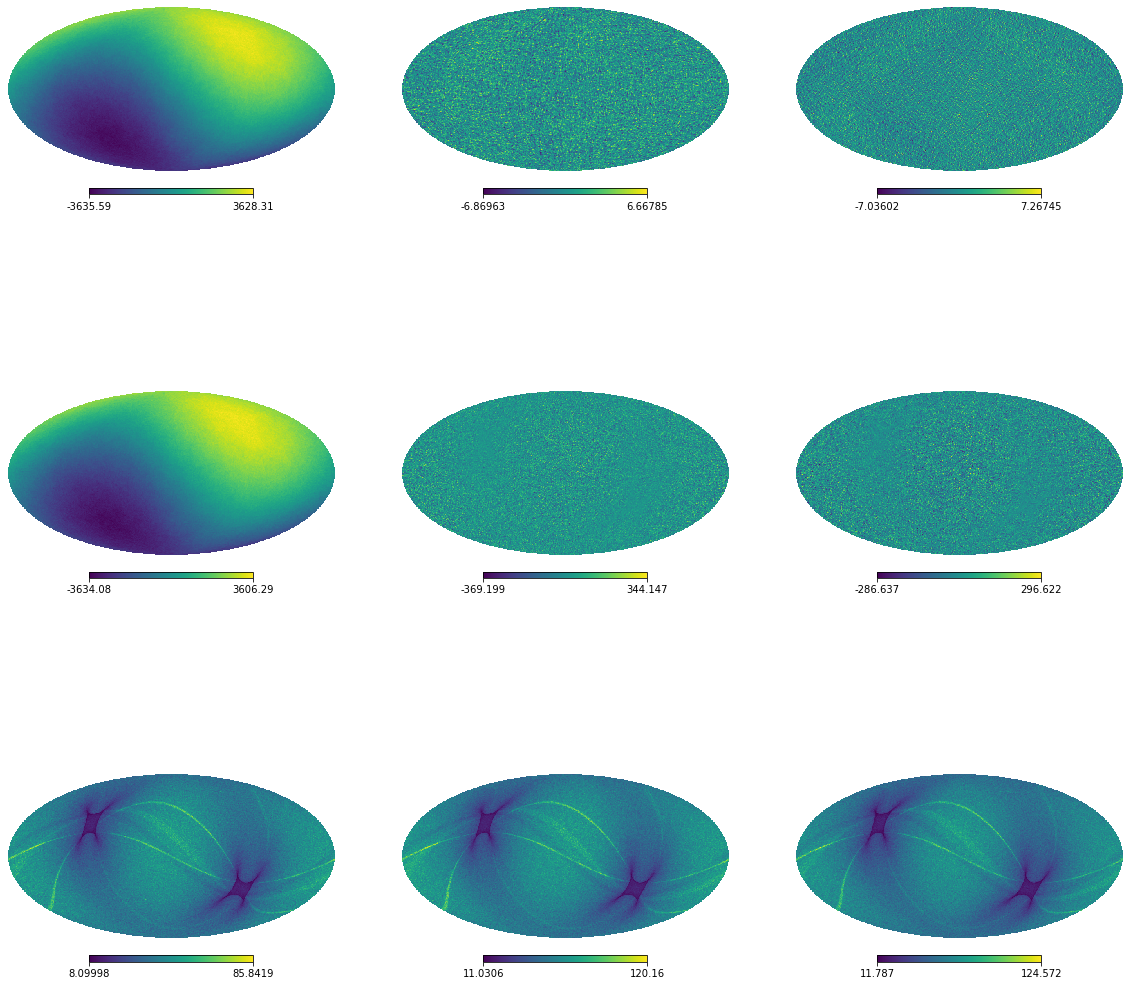

<Figure size 432x288 with 0 Axes>

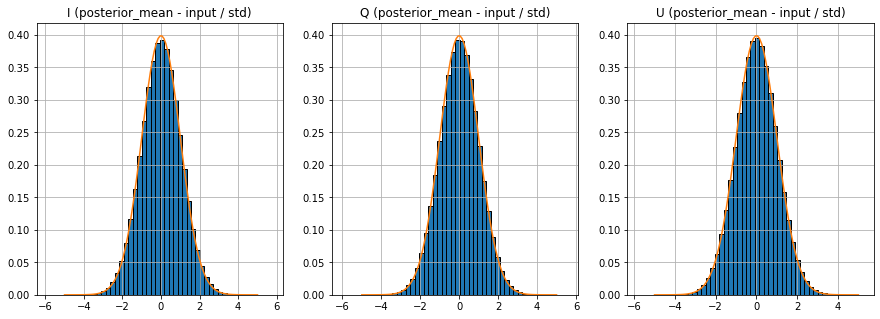

<Figure size 432x288 with 0 Axes>

In [13]:
plot_map_result(input_cmb, cmb_mean, cmb_rms, 'cmb')